<h1><center><font color="black">Predicting the impact of Blockhain technologies</font></center></h1>

<center><b>Proposal By:</b> Paul Owe</center>
<center><b>Date:</b> Jan 11, 2021</center>

<font color="blue"><h3>1. Introduction: Context and Significance</h3></font>
The story begins with a reflection of Peter Thiel's [Zero to One: Notes on Startups, or How to Build the Future]() as he speaks to the importance of making sense of the backdrop of modern technology movements and grasping the opportunities that emerge, while remaining nimble. The author shares a brilliant idea that most people will resonate with, however, the question is, how does one effectively go about exhibiting this trait?

Chapter 2 of [Persistent Forecasting of Disruptive Technologies](https://www.nap.edu/catalog/12557/persistent-forecasting-of-disruptive-technologies) describes how technology forecasting methods are widely used by the private sector and by governments for applications ranging from predicting product development or a competitor’s technical capabilities to the creation of scenarios for predicting the impact of future technologies.

Today, we see Blockhain technology enabling a wide variety of practical business applications ranging from financial services, to digital art marketplaces. Reputable technology companies such as Google are also [launching a Blockchain division](https://news.bitcoin.com/report-google-launches-blockchain-division/). 

[Harvard Business Review](https://hbr.org/2017/01/the-truth-about-blockchain), also released a report which aligns  with the idea that Blockchain has enormous potential to create new foundations for our economic and social systems and the predicts the impact of this technology to be disruptive.

The reason therefore for pursuing this project is to conduct an exploratory data analysis of landscape to gain foundational knowledge and assess the impact of the technology within its various use cases and scenarios.



<font color="blue"><h3>2. Goals and Expected Outcomes</h3></font>
The tasks carried out in the report support the goal of predicting the impact of Blockhain 

This project has the following expected outcomes

1. Understand the trends surrounding the deluge of blockchain applications

2. Build a robust data pipeline that iteratively extracts, validate, preprocess, transform and loads data, leveraging multiple online sources

3. Maintain a reliable knowledge base about blockchain technologies for downstream analytics tasks

4. Carry out in-depth analysis to extract patterns and impact analysis   



<font color="blue"><h3>3. Architecture</h3></font>
The process and implementation will follow the general architecture for knowledge discovery as presented in Jiawei Han's [Data Mining - Concepts and Techniques](http://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf)

<img src="https://uol-datascience.s3.ca-central-1.amazonaws.com/kdd_process.png" height="400" width="400"/>



<font color="blue"><h3>4. Data Sources</h3></font>
<font color="red"><h4>4.1 Data requirements</h4></font>

**Data sources for Coursework 1**

1. [Google Trends](https://trends.google.com/trends/) 

Google Trends is a website that analyzes the popularity of top search queries in Google Search across multiple countries and languages. The motivation for using this data source is to explore global search trends, identify the possible ways the public might search for information on a topic and discover interesting patterns.

Google Trends data will especially help to identify developing interests in blockchain technology that deserve special attention in subsequent analysis.

People's internet searches can be an important source for generating hypotheses about public awareness and interest in Blockchain technology as well as evaluating changes in information seeking.

2. [CoinmarketCap Alexandria](https://coinmarketcap.com/alexandria)

Coinmarketcap Alexandria is a website that collects all of the data about the blockchain space, ranging from cryptocurrencies, to NFTs and DeFi projects, all the way to Metaverse projects, and puts it in one, online location, so that anyone, anywhere can find out more about any particular assets aand projects they are interested in. I intend to leverage this website to scrape articles for future analysis.


**Potential sources for Coursework 2**

3. [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)

Wikidata is a free and open knowledge base that can be read and edited by both humans and machines.
Wikidata acts as central storage for the structured data of its Wikimedia sister projects including Wikipedia, Wikivoyage, Wiktionary, Wikisource, and others.  The content of Wikidata is also provided under a free license, making it an excellent resource to consider for data mining

4. [GDELT Project (Global Knowledge Graph)](https://www.gdeltproject.org/data.html) 

The GDELT Project is the largest, most comprehensive, and highest resolution open database of human society ever created. This Global knowledge graph will be very useful for analysis of events in order to augment the Blockchain knwoledge graph I intend to build. Its Global Knowledge Graph connects the world's people, organizations, locations, themes, counts, images and emotions into a single holistic network

<font color="red"><h4>4.2 Ethics of use of data</h4></font>

- Add: Description of where the data has come from e.g. open or proprietary or a combination of both.
- Talk about who owns derivative analysis

<font color="blue"><h3>5. Mining Google Trends Reports from Public APIs and Databases</h3></font>
[Google Trends](https://trends.google.com/trends/?geo=CA) is a website by Google that analyzes the popularity of top search queries in Google Search across various regions and languages. The website uses graphs to compare the search volume of different queries over time.

In [4]:
#### Import Libraries and Authenticate into Google Cloud
import numpy as np
import pandas as pd
from pytrends.request import TrendReq
# import requests
# import urllib
from datetime import datetime, timedelta
import nltk

<font color="red"><h4>5.1 Querying Avaialble Reports</h4></font>
In this section, we start off with a list of `search_queries` used to build awareness of the blockchain ecosystem 

The list contains a few terms that pertain to the domains, or use cases of Blockchain technology, that we are of interest for our exploration purposes.

We will use this list in order to conduct a high level analysis about existing trends, leveraging the PyTrends API, which will automate the extraction of reports from the Google Trends website and enhance our knowledge about the types of related queries and topics internet users most frequently search for.

In [5]:
# Initialize Pytrend client
pytrend = TrendReq() 

#### <font color="green">5.1.2 Search queries</font>

Create a list of `search_queries`.

**Why?**

For broad observability over the technology

In [6]:
search_queries = ['Cryptocurrency', 'DeFi', 'NFTs']

#### <font color="green">5.1.3 Capturing Related Queries</font>
Next, we want to gather related queries for each search query above. 

**Why?** 

We do this to build up our knowledge of the side-by-side searches people make against `search_queries`. This information is very useful for extracting additional context and insight on the ways majority of users search . fFor our analysis we wish to discover various ways internet users seek to engage with blockchain enabled projects.

**How?**

The `related_queries` method will return a dictionary of Pandas Dataframes. Each dictionary object in `combined_metrics_list` list has two keys, which we can use as metrics: Top and Rising

* **Top** - The most popular search queries. Scoring is on a relative scale where a value of 100 is the most commonly searched query, 50 is a query searched half as often as the most popular query, and so on.

* **Rising** - Queries with the biggest increase in search frequency in the past year. 

For each search query, the objective is to accumulate all the resulting Top dataframes, in the `top_metrics_list` and then concatenate all the items in this list into one Dataframe called `top_df`. 

Similarly, we will follow the same process for creating the `rising_df` dataframe for all the observed Rising metrics.

In [9]:
# list of multiple dataframes, containing top metrics for each primary keyword
top_metrics_list = []
top_df = []

# list of multiple dataframes, containing rising metrics for each primary keyword
rising_metrics_list = []
rising_df = []

for keyword in search_queries:
    # specify geo and timeframe for the past year
    pytrend.build_payload(kw_list=[keyword], geo='US', timeframe='today 12-m')
    related_queries = pytrend.related_queries()

    try:
        # Returns a list of Pandas Dataframe dictionaries
        combined_metrics_list = list(related_queries.values())
    except Exception as e:
        print(f"Could not obtain related queries. Operations Failed with the following exception: {e}")
    
    # tdf is pandas.core.frame.DataFrame 
    tdf = combined_metrics_list[0]['top']
    # tdf is pandas.core.frame.DataFrame 
    rdf = combined_metrics_list[0]['rising']
    
    # Create primary_keyword column to be used as index
    tdf['search_query'] = [keyword] * len(tdf.index)
    rdf['search_query'] = [keyword] * len(rdf.index)
    
    # Append Dataframes to list
    top_metrics_list.append(tdf)
    rising_metrics_list.append(rdf)
    
# Merge dataframes together
top_df = pd.concat(top_metrics_list)
rising_df = pd.concat(rising_metrics_list)

# inplace=True modifies the DataFrame in place
top_df.set_index('search_query', inplace=True)
rising_df.set_index('search_query', inplace=True)

In [10]:
top_df # 75 search top queries

,query,value
search_query,,
Cryptocurrency,cryptocurrency price,100
Cryptocurrency,crypto,91
Cryptocurrency,bitcoin,81
Cryptocurrency,cryptocurrency bitcoin,79
Cryptocurrency,buy cryptocurrency,72
...,...,...
NFTs,free nfts,9
NFTs,are nfts bad for the environment,9
NFTs,why nfts are bad,9


In [11]:
rising_df # 75 search top rising queries

,query,value
search_query,,
Cryptocurrency,shiba inu,611200
Cryptocurrency,shiba inu cryptocurrency,595800
Cryptocurrency,shiba coin,464450
Cryptocurrency,shiba inu coin cryptocurrency,445600
Cryptocurrency,shiba inu coin,439550
...,...,...
NFTs,metamask,102800
NFTs,ape nfts,97750
NFTs,nfts stock,97050


#### <font color="green">5.1.4 Visualize Related Queries</font>
Next, let's sort the data, and preview top 5 queries for each of our `search_queries`, sorted by their poularity value. 

We do not want to actually change or affect the original dataframe. For that reason, we will create a deep copy of the dataframe and sort that copy instead. This operation will be slow and consume more memory compared to a shallow copy but preserves the original dataframe

In [15]:
# Visualize top 5 queries for each of the 4 primary_keywords (blockchain applications)
top_df_dcopy = top_df.copy(deep=True)
top_df_dcopy = top_df_dcopy.sort_values('value', ascending=False).groupby('search_query').head(5)

In [58]:
top_df_dcopy

,query,value
primary_keyword,,
Cryptocurrency,crypto,100
DeFi,defi crypto,100
NFTs,nft,100
Cryptocurrency,cryptocurrency price,99
NFTs,what are nfts,83
Cryptocurrency,best cryptocurrency,77
Cryptocurrency,bitcoin cryptocurrency,76
Cryptocurrency,bitcoin,76
DeFi,what is defi,47


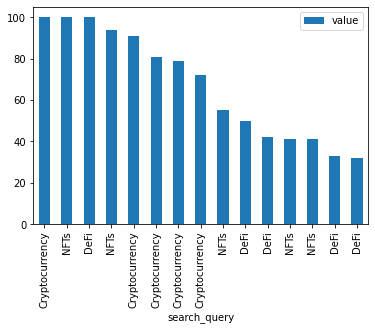

In [16]:
ax = top_df_dcopy.plot.bar()

Using the bar plot above we observe that Cryptocurrency is the most popular and widely searched application of blockchain technology, all time.

Closely followed by NFTs and finally DeFi applications. In fact, the most popular searches about DeFi are only half as popular as the ones about Crpytocurrencies. 

This comes as no surprise because the first use case of Blockchain technology was through the public transaction ledger of Bitcoin. 

Similarly, we will follow the same procedure above to create a visualization using the `rising_df` Dataframe

In [18]:
# rising_df.head(10)
# Visualize top 5 queries for each of the 4 primary keywords
rising_df_dcopy = rising_df.copy(deep=True)
rising_df_dcopy = rising_df_dcopy.sort_values('value', ascending=False).groupby('search_query').head(5)

In [19]:
# rising_df.shape
rising_df_dcopy

,query,value
search_query,,
Cryptocurrency,shiba inu,611200
Cryptocurrency,shiba inu cryptocurrency,595800
NFTs,nfts to buy,590700
NFTs,what is nfts,501000
Cryptocurrency,shiba coin,464450
Cryptocurrency,shiba inu coin cryptocurrency,445600
Cryptocurrency,shiba inu coin,439550
NFTs,nfts art,363550
NFTs,best nfts,351100


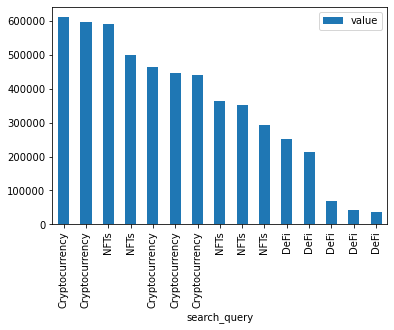

In [20]:
ax = rising_df_dcopy.plot.bar()

In the above bar plot, we observe that NFTs have had a tremendous increase in search frequency over the past year, surpassing Cryptocurrencies.

The pattern we observe amplifies the current narrative in social media about a new and emerging creative economy which enables art to be referenced as metadata using smart contracts on the blockhain. It is remarkable to observe such search trends because they represent an opportunity to dig deeper about the underlying reasons for this sharp increase.

In [21]:
nft_interest_data = pytrend.interest_over_time() 
nft_interest_data

,NFTs,isPartial
date,,
2021-01-31,1,False
2021-02-07,2,False
2021-02-14,5,False
2021-02-21,9,False
2021-02-28,14,False
2021-03-07,23,False
2021-03-14,13,False
2021-03-21,19,False
2021-03-28,17,False


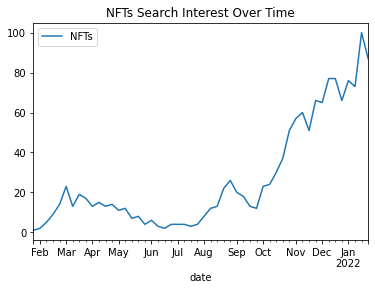

In [22]:
# Plot interest over time
line = nft_interest_data.plot.line(title='NFTs Search Interest Over Time')

#### <font color="green">5.1.5 Capturing Related Topics</font>
Users searching for items the `primary_keywords` list also searched for these topics. 

* Top - Represents the most popular searches that are frequently searched with each term. Scoring is on a relative scale where a value of 100 is the most commonly searched topic and a value of 50 is a topic searched half as often as the most popular term, and so on.

* Rising - Represents related topics with the most significant increase in search volume within a time period (past 24 hours is the default)**. Results marked "Breakout" had a tremendous increase in search volume that grew by more than 5000%.

In [164]:
# code here

#### <font color="green">5.1.6 Capturing Keyword Suggestions</font>

In [71]:
# code here

#### <font color="green">5.1.7 Look at distributions, Data slicing, etc</font>
...
- Univariate analysis
- Histograms of measures
* some tests have an assumption of normal distribution, So if it's not normal, it'll need to be transformed

#### <font color="green">5.1.8 Noise and Outlier analysis</font> 
- Consider Practical significance
...

#### <font color="green">5.1.1 Validating Google Trends API based reports for consistency</font>

In subsequent analytical tasks, I would like to leverage the Pytrends API to

a) Make use of the high-quality reports available from Google Trends website, in order to create new derivative analysis and knowledge in this specific domain. The point of using this pre-analysis is to accelerate the extraction of intersting insights.

*Comment: Considerations about usage/reusage of data. Who owns derivative data/analysis?*

b) Conduct a Time series analysis to understand the progression of these trends, **globally**. To do that, I will need to keep a record of the time period in which we observed the trend using Timestamps.

The Pytrends API is an excellent resource which facilitates the aforementioned tasks. However, it is an unofficial API for Google Trends and the library is likely not maintained by Google.

For that matter, prior to conducting this analysis, or using the reports provided from this API, we need to rule out any variability in the data that might exist, and negatively impact the quality or credibility of future analysis. 

Because of this risk, the objective in this section is to validate the data against the Google Trends website itself to ensure that it is self-consistent and that it represents what I think it does. 




<font color="red"><h3>5.2 Exploring Google Trends dataset in BigQuery</h4></font>

- What additional information exists from BQ?
- Reasonable justificaiton for modification
- Modifications should Add value or utility (descriptive power, performance, improvement of analysis)
- Changes to data should utilize advanced techniques (converting between fromats, replacing null data with aggregate data)

... 

... In order to achieve this, we will issue a query to Google's Bigquery public dataset (which is a reliable, alternative, but limited extraction source maintained by Google), and augment the API based reports with the results from the `bigquery-public-data.google_trends.top_rising_terms` and `bigquery-public-data.google_trends.top_terms` tables stored in the Google Trends dataset. 

The expectation is that the data extracted from Bigquery will ...

In [33]:
from google.cloud import bigquery
project_id = "uol-datascience"
client = bigquery.Client(project=project_id)

# Perform a query.
rising_trends = (
    'SELECT distinct term FROM `bigquery-public-data.google_trends.top_terms`'
    'WHERE refresh_date = DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY) '
    'LIMIT 100')
query_job = client.query(rising_trends)  # API request
rows = query_job.result()  # Waits for query to finish, ADD CHECKS FOR FAILED QUERY

# Create a pandas DataFrame by loading all pages of a query 
# https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.table.RowIterator.html
rows_df = rows.to_dataframe() 
print(rows_df)

/Users/pcowe/opt/anaconda3/lib/python3.8/site-packages/google/auth/_default.py:68: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


                              term
0                            49ers
1                           Saints
2                          Raiders
3                       Joe Burrow
4                      Carole King
5                      John Madden
6                      Josh Giddey
7                      Real Madrid
8                     James Taylor
9                     NFL playoffs
10                   Antonio Brown
11                   Tori Spelling
12                  Kendall Jenner
13                  Miami Dolphins
14                  Rams vs Ravens
15                 Super Bowl 2022
16                 Trevor Lawrence
17               Green Bay Packers
18            Cardinals vs Cowboys
19            Eagles vs Washington
20            Winter storm warning
21            Yellowstone Season 5
22           Comedian George Lopez
23        Traxamillion passed away
24  Marjorie Taylor Greene Twitter


#### <font color="green">5.2.1 Look at distributions, Data slicing, etc</font>
...
- Univariate analysis
- Histograms of measures
* some tests have an assumption of normal distribution, So if it's not normal, it'll need to be transformed

#### <font color="green">5.2.2 Noise and Outlier analysis</font> 
- Consider Practical significance
...

<font color="blue"><h2>6. Web Scraping CoinMarketCap for News Articles</h2></font>

In this section I will demonstrate how we can scrape relevant news articles and store them in a Pandas dataframe. Thereafter, we will explore and discover any additional useful information we can leverage.

### <font color="red">6.1 Scrape CoinMarketCap Site</font>
Scrape CoinMarketCap [Latest Articles](https://coinmarketcap.com/alexandria). We are interested in the following topic filters
- Blockchain
- DeFi
- NFTs

In this section we want to return soup, or the HTML page for each category.

In [7]:
# import json
# import re #regular expression
import urllib.request as u
import pandas as pd
from bs4 import BeautifulSoup as bs
# import os

In [8]:
# List of relevant topic filters of interest on CoinMarketCap
coinmarketcap_topic_filters = ["blockchain", "defi", "nfts"]

Here, we will define utility functions for scraping and data preprocessing articles based on the list of `topic_filters` Coinmarketcap uses to organize articles.

In [9]:
def scrape(topic_filter):
    
    proxy_handler = u.ProxyHandler({})
    opener = u.build_opener(proxy_handler)
    
        
    req = u.Request(f'https://coinmarketcap.com/alexandria/article?tags={topic_filter}')
    
    
    response = opener.open(req)
    result = response.read()
    soup = bs(result,'html.parser')
    
    return soup

def scrape_all_filters(topic_filter):
    
    try:
        for filter in topic_filter:  
            # dynamically variable names and store each filter's soup 
            globals()[f'{filter}_soup'] = scrape(filter)
            
    # Show what is the exception in case scraping fails
    except Exception as e:
        print(f"Exception occured while attempting to scrape data: {e}")
           

In [10]:
scrape_all_filters(coinmarketcap_topic_filters)

Sample HTML page with articles filtered by 'DeFi'

In [ ]:
print(defi_soup.prettify()) # works

In [27]:
# All Defi Article titles, and summary nested in this div tag
all_defi = defi_soup.find('div', {'class': 'sc-bdfBwQ Grid-sc-3uwl3g-0 egdQUi ca-Ddcc'})
defi_article_links = all_defi.find_all('a')
# Confirm 18 article links extracted
len(defi_article_links)

18

##### Extract Link slug, Author Name, Article Title and Article Text and Text Summary

In [30]:
first_defi_article = defi_article_links[1]


In [31]:
first_defi_article.get_text()

'EasyDeFiCrypto Lost in Scams Hits $7.7B in 2021 — Up 81%The surge has been fueled by a rise in so-called "rug pulls" — predominantly found in the world of decentralized finance.By Connor Sephton2w ago2m'

In [32]:
# Get the slug
first_defi_article['href']

'/alexandria/article/crypto-lost-in-scams-hits-7-7b-in-2021-up-81'

#### <font color="green">6.1.1 Look at distributions, Data slicing, etc</font>
...
- Univariate analysis
- Histograms of measures
* some tests have an assumption of normal distribution, So if it's not normal, it'll need to be transformed

#### <font color="green">6.1.2 Noise and Outlier analysis</font> 
- Consider Practical significance
...

### <font color="red">6.2 Upload News Article files to Google Cloud Storage using the Google Python Client</font>

Use this resource:
https://github.com/GoogleCloudPlatform/storage-file-transfer-json-python

In [ ]:
from google.cloud import storage
import os
import pandas as pd

# Only need this if you're running this code locally.
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/your_GCP_creds/credentials.json'

df = pd.DataFrame(data=[{1,2,3},{4,5,6}],columns=['a','b','c'])

client = storage.Client()
bucket = client.get_bucket('my-bucket-name')
    
bucket.blob('upload_test/test.csv').upload_from_string(df.to_csv(), 'text/csv')

<font color="blue"><h2>7. Connecting to Discord For Data via Websockets</h2></font>
Discord is an app used for real time text chat. 

Discord servers are set up by people and generally are focused on a certain community. We will use them to explore the NFT community as an example.

Many groups and organizations have discord servers for people to chat with each other. A Discord server often has many channels,  which are different rooms that you can chat in.  

A discord bot is a user in your Discord server that is controlled by a program instead of a person. You can write a python program to perform a variety of tasks such as question-answering, server management, and provide real-time services through webhooks, which opens up endless opportunities to explore a fertile ground where discussion about these NFTs happen.

Note to achieve this, we will need a Developer account found [here](https://discord.com/developers/applications) 

Gateways are Discord's form of real-time communication over secure WebSockets

In [1]:
!pip install discord

     |████████████████████████████████| 786 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 648 kB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 8.2 MB/s  eta 0:00:01
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
     |████████████████████████████████| 121 kB 6.1 MB/s eta 0:00:01


In [5]:
import discord # revolves around events, async library, uses callbacks
import os

In [6]:
os.environ

environ{'SHELL': '/bin/zsh',
        'TMPDIR': '/var/folders/1j/w13pmgjd6r59876tb75jxls80000gn/T/',
        'CONDA_SHLVL': '1',
        'CONDA_PROMPT_MODIFIER': '(base) ',
        'LC_ALL': 'en_US.UTF-8',
        'USER': 'pcowe',
        'CONDA_EXE': '/Users/pcowe/opt/anaconda3/bin/conda',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.iRW9fkysKA/Listeners',
        '__CF_USER_TEXT_ENCODING': '0x1F5:0x0:0x52',
        '_CE_CONDA': '',
        'CONDA_ROOT': '/Users/pcowe/opt/anaconda3',
        'PATH': '/Users/pcowe/opt/anaconda3/bin:/Users/pcowe/opt/anaconda3/condabin:/usr/bin:/bin:/usr/sbin:/sbin',
        'CONDA_PREFIX': '/Users/pcowe/opt/anaconda3',
        'PWD': '/Users/pcowe',
        'LANG': 'en_US.UTF-8',
        'XPC_FLAGS': '0x0',
        '_CE_M': '',
        'XPC_SERVICE_NAME': '0',
        'HOME': '/Users/pcowe',
        'SHLVL': '2',
        'CONDA_PYTHON_EXE': '/Users/pcowe/opt/anaconda3/bin/python',
        'LOGNAME': 'pcowe',
        'LC_CTYPE': 'UTF-8',
     

In [20]:
!source env.sh

In [29]:
# print(os.environ.get('BOT_TOKEN'))
# 'BOT_TOKEN' in os.environ
# os.environ['BOT_TOKEN']='OTMzMTUzODg4ODY4MTE4NTM4.YedZSA.V_Bf9f6jYkhMwlXcctzhU1S-RDM'

True

In [ ]:
client = discord.Client()
# register an event
@client.event
async def on_ready(): # when bot is ready to be used
    print(f'Hello World. Logged in as {client.user}')

# if messaged received

# register an event
@client.event
async def on_message(message): # triggers each time message received, apart from if message is ours
    if message.author == client.user:
        return
    elif message.content.startswith('$hello'):
        await message.channel.send('Hello') #return message back to discord
client.run('BOT_TOKEN')

<font color="blue"><h2>7. Limitations of this study</h2></font>

**Limitations of this study**
- Google BigQuery dataset: BQ has additional data attributes that can be used to augment Google Trends data, however since the table is limited to the US, it is impossible to access comprehensive data for Global trends.

- The utility of Google Trends depends areas where there is significant search volume. 

- Google Trends data represent only searches done using Google.

**Addressing these limitations in CW2**
- Discuss how you will address these limitaitons in CW2

<font color="red"><h4>Challenges and Limitations of Data sources</h4></font>

- Point of View shifts in analysis based on Geography Unit of Analysis

Other ideas to consider:

- [Online vs Offline gathering of data rationale?](https://cloud.google.com/architecture/migration-to-google-cloud-transferring-your-large-datasets#online_versus_offline_transfer)
 
- Augur (Wisdom of Crowds - For opinions crowd sourcing, decentralized information gathering) - https://www.augur.net/ or https://www.ibm.com/blogs/insights-on-business/electronics/demand-forecasting-reinvented/

<font color="blue"><h2>8. References</h2></font>

Aggarwal C. (2014) Applications of Frequent Pattern Mining. In: Aggarwal C., Han J. (eds) Frequent 	Pattern Mining. Springer, Cham. https://doi.org/10.1007/978-3-319-07821-2_18

David, D. (2021, October 6). How to use google trends API with python. Hackernoon. https://hackernoon.com/how-to-use-google-trends-api-with-python

Foord, M. (n.d.). HOWTO fetch internet resources using the urllib package. Python Software Foundation. https://docs.python.org/3/howto/urllib2.html

Google Cloud Platform. (n.d.). Google trends. https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/google-search-trends?_ga=2.168421729.-1769881535.1639929906&project=cloud-architect-sandbox&pli=1

Hagberg, A. A., Schult, D. A. & Swart, P. J. (2008). Exploring Network Structure, Dynamics, and Function using NetworkX. In G. Varoquaux, T. Vaught & J. Millman (eds.), Proceedings of the 7th Python in Science Conference (pp. 11 - 15), Pasadena, CA USA.

Hu, M., & Lobato, A. (2021, June 28). Top 25 google search terms, now in BigQuery. Google Cloud. https://cloud.google.com/blog/products/data-analytics/top-25-google-search-terms-now-in-bigquery?utm_source=youtube&utm_medium=unpaidsoc&utm_campaign=CDR_swo_analytics_trendsvideo_trendsdatasetblog_071421&utm_content=description

Matsa, K. E., Mitchell, A., & Stocking, G. (2017, April 27). Methodology. Pew Research Center. https://www.pewresearch.org/journalism/2017/04/27/google-flint-methodology/

Rajput, A. (2021, August 2). KDD process in data mining. GeeksforGeeks. https://www.geeksforgeeks.org/kdd-process-in-data-mining/

Riley, P. (2021, June 28). Good data analysis. Google Developers. https://developers.google.com/machine-learning/guides/good-data-analysis#fnref2

Ritcher, S. (2021, December 25). lxml – XML and HTML with python. lxml. https://lxml.de/

Stocking, G., & Matsa, K.E. (2017, April 27). Using google trends data for research? Here are 6 questions to ask. Medium. https://medium.com/@pewresearch/using-google-trends-data-for-research-here-are-6-questions-to-ask-a7097f5fb526

Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008

--------------
All links:
https://www.eecs.yorku.ca/course_archive/2019-20/W/4412/lecnotes/pdf/asso1-2.pdf

https://cloud.google.com/blog/products/data-analytics/top-25-google-search-terms-now-in-bigquery?utm_source=youtube&utm_medium=unpaidsoc&utm_campaign=CDR_swo_analytics_trendsvideo_trendsdatasetblog_071421&utm_content=description


https://newsinitiative.withgoogle.com/training/lessons?tool=Google%20Trends&image=trends&_ga=2.222842078.45681505.1640904399-1263853304.1640614835

https://www.pewresearch.org/journalism/2017/04/27/google-flint-methodology/

https://medium.com/@pewresearch/using-google-trends-data-for-research-here-are-6-questions-to-ask-a7097f5fb526

https://hackernoon.com/how-to-use-google-trends-api-with-python

https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/google-search-trends?_ga=2.168421729.-1769881535.1639929906&project=cloud-architect-sandbox

https://cloud.google.com/blog/products/data-analytics/top-25-google-search-terms-now-in-bigquery?utm_source=youtube&utm_medium=unpaidsoc&utm_campaign=CDR_swo_analytics_trendsvideo_trendsdatasetblog_071421&utm_content=description

https://developers.google.com/machine-learning/guides/good-data-analysis#fnref2

https://docs.python.org/3/howto/urllib2.html

https://lxml.de

https://www.nap.edu/read/12557/chapter/4

https://www.geeksforgeeks.org/kdd-process-in-data-mining/

http://pandas-docs.github.io/pandas-docs-travis/user_guide/text.html

https://link.springer.com/chapter/10.1007/978-3-319-07821-2_18

-------
Not uet refrenced properly
https://www.eecs.yorku.ca/course_archive/2019-20/W/4412/lecnotes/pdf/asso1-2.pdf


https://newsinitiative.withgoogle.com/training/lessons?tool=Google%20Trends&image=trends&_ga=2.222842078.45681505.1640904399-1263853304.1640614835


http://pandas-docs.github.io/pandas-docs-travis/user_guide/text.html

https://www.python-graph-gallery.com/web-circular-barplot-with-matplotlib

https://bmjopen.bmj.com/content/5/6/e006678


# Coursework 2

<font color="blue"><h2> 7. Building a Knowledge Graph (CW2)</h3></font>
In this section, I will demonstrate how we can discover details of emerging crypto projects by building a graph. This will be our knowledge graph. A knowledge graph organizes information into an ontology. 


 **Why?**
    
    
 It turns out many real world system can be modelled as networks ... By choosing this model we can leverage many graph algorithms and perform interesting tasks such as
    
- Easily query knwoledge graph for answers to questions like "Which blockhain projects share similar developer groups and/or founders?"
- Analyze and predict the utility of blockchain project to identify potential unicorns projects early on

Using a knowledge graph, we can model relationships (edges/predicates) that connect a list of blockchain projects (nodes/subjects) to other relevant projects, companies, people involved, news articles (also nodes/subjects).

We will perform the following tasks to achieve the above described objective

1. Build the graph through Triples extraction
2. Extract infomration from news
3. Add news data to the knowledge graph
4. Make inferences

Use Qwikdata pacakge to query for information about entities from Wikidata.


In [3]:
!pip install qwikidata

<font color="red"><h4>6.1 Triples Extraction from WikiData</h4></font>
Objective: Demonstrate utility of publicly available data sources

Given a list of [SUBJECTS] (identified from above analysis Trends analysis) and a list of predicates we are interested in, let's write a function that will extract the list of (subject, predicate, object) triples.



In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qwikidata.entity import WikidataItem, WikidataLexeme, WikidataProperty
from qwikidata.linked_data_interface import get_entity_dict_from_api

# Progress bar
from tqdm.notebook import tqdm

Lets write a function that takes in the list of companies we want to consider as well as the relationships (predicates) these companies have with other entities. The function should retunr the (subject, predicate, object) triples, where the subject is the company. For example, we would like:

$$ (Tesla, CEO, Elon Musk) $$

#### <font color="green">6.1.1 List of Projects, Companies</font>

In [95]:
# List of Blockchain applications
KG_financial = ["NFTs"]

In [12]:
# test wikidata
q42_dict = get_entity_dict_from_api("Q42") # https://qwikidata.readthedocs.io/en/stable/qwikidata.linked_data_interface.html?highlight=et_entity_dict_from_api#qwikidata.linked_data_interface.get_entity_dict_from_api
#print(q42_dict) # huge json object of everything - Get a dictionary representing a wikidata entity from the linked data interface API.
q42 = WikidataItem(q42_dict)
q42

WikidataItem(label=Douglas Adams, id=Q42, description=English writer and humorist, aliases=['Douglas Noel Adams', 'Douglas Noël Adams', 'Douglas N. Adams'], enwiki_title=Douglas Adams)

In [13]:
def get_triples_from_wikidata(companies_list, predicate_list):
    """
    Inputs: subject_list - a list of companies, Q id.
            predicate_list - a list of predicates, P id
    Outputs: (company, predicate, object) triples
    """
    subjects, predicates, objects = [], [], []
    # For each Company, get its  WikidataItem Id
    for Q_id in tqdm(companies_list):
        print(companies_list)
        # WikidataItem - https://qwikidata.readthedocs.io/en/stable/entity.html?highlight=WikidataItem
        Q_company = WikidataItem(get_entity_dict_from_api(Q_id))
        
        # loop through each of the predicates we would like 
        # to explore and see if there are any objects that are related to the company through the predicate
        for predicate in predicate_list:
            #Add check here for get_claim_group in case it fails
            
            # add note here
            for claim in Q_company.get_claim_group(predicate):
                
                object_id = claim.mainsnak.datavalue.value["id"]
                object_entity = WikidataItem(get_entity_dict_from_api(object_id))
                
                subjects.append(Q_company.get_label())
                # add notes here
                predicate_property = WikidataProperty(get_entity_dict_from_api(predicate))
                predicates.append(predicate_property)
                
                objects.append(object_entity.get_label())
    return subjects, predicates, objects
    

#### <font color="green">6.1.2 Companies List</font>

In [14]:
# Figure out how To generate these from KG_financials. Insert conversion query here
companies_list = ["Q95", "Q2283", "Q193326", "Q744149", "Q1418", "Q312", "Q41187", "Q20716", "Q248", "Q37156", "Q17077936", "Q355", "Q23548", "Q3884", "Q66", "Q4781944", "Q478214",
                  "Q907311"]
    

#### <font color="green">6.1.3 Predicate List</font>
The predicate list holds a list of relationships we would like to capture in our knowledge graph. P31 for example is, "instance of", which could be used in a triple: (Google, instance of, technology company).

In [15]:
predicate_list = ["P31", "P17", "P361", "P452", "P112", "P169", "P463", "P355", "P1830", "P1056"]

In [16]:
subjects, predicates, objects = get_triples_from_wikidata(companies_list, predicate_list)
# store all of this in a Pandas dataframe, where each row is a triple
wiki_triples_df = pd.DataFrame({"subject": subjects, "predicate": predicates, "object": objects})
# print(subjects)

  0%|          | 0/18 [00:00<?, ?it/s]

['Q95', 'Q2283', 'Q193326', 'Q744149', 'Q1418', 'Q312', 'Q41187', 'Q20716', 'Q248', 'Q37156', 'Q17077936', 'Q355', 'Q23548', 'Q3884', 'Q66', 'Q4781944', 'Q478214', 'Q907311']
['Q95', 'Q2283', 'Q193326', 'Q744149', 'Q1418', 'Q312', 'Q41187', 'Q20716', 'Q248', 'Q37156', 'Q17077936', 'Q355', 'Q23548', 'Q3884', 'Q66', 'Q4781944', 'Q478214', 'Q907311']
['Q95', 'Q2283', 'Q193326', 'Q744149', 'Q1418', 'Q312', 'Q41187', 'Q20716', 'Q248', 'Q37156', 'Q17077936', 'Q355', 'Q23548', 'Q3884', 'Q66', 'Q4781944', 'Q478214', 'Q907311']
['Q95', 'Q2283', 'Q193326', 'Q744149', 'Q1418', 'Q312', 'Q41187', 'Q20716', 'Q248', 'Q37156', 'Q17077936', 'Q355', 'Q23548', 'Q3884', 'Q66', 'Q4781944', 'Q478214', 'Q907311']
['Q95', 'Q2283', 'Q193326', 'Q744149', 'Q1418', 'Q312', 'Q41187', 'Q20716', 'Q248', 'Q37156', 'Q17077936', 'Q355', 'Q23548', 'Q3884', 'Q66', 'Q4781944', 'Q478214', 'Q907311']
['Q95', 'Q2283', 'Q193326', 'Q744149', 'Q1418', 'Q312', 'Q41187', 'Q20716', 'Q248', 'Q37156', 'Q17077936', 'Q355', 'Q23548', 

I will also store the triples in a list, called wiki_triples, which will be useful later.

In [ ]:
wiki_triples = []
# Iterate through each row. itterrows yields index of the row, 0 1 2 and row data as Series object 
for index, data in wiki_triples_df.iterrows():
    wiki_triples.append((row.subject, row.predicate, row.object))

<font color="red"><h4>6.2 Explore Triples Data from WikiData</h4></font>


In [25]:
wiki_triples_df.sample(10)

,subject,predicate,object
783,IBM,"WikidataProperty(label=instance of, id=P31, de...",enterprise
1098,Boeing,"WikidataProperty(label=industry, id=P452, desc...",space industry
204,Google,"WikidataProperty(label=owner of, id=P1830, des...",Waymo
406,Goldman Sachs,"WikidataProperty(label=founded by, id=P112, de...",Samuel Sachs
650,Sony,"WikidataProperty(label=owner of, id=P1830, des...",Bend Studio
537,Apple Inc.,"WikidataProperty(label=member of, id=P463, des...",Camera & Imaging Products Association
340,Microsoft,"WikidataProperty(label=owner of, id=P1830, des...",System Center Advisor
56,Google,"WikidataProperty(label=subsidiary, id=P355, de...",FeedBurner
330,Microsoft,"WikidataProperty(label=owner of, id=P1830, des...",The Coalition
705,Sony,WikidataProperty(label=product or material pro...,communication device


##### <font color="green">6.2.1 Describe the Data</font>

<font color="red"><h4>6.3 Knowledge Graph Visualization</h4></font>

Often times visualizations are a good way of conceptually understanding the data structure we are working with. With that said, there are a ton of great libraries out there for network analysis. 

[Networkx](https://networkx.github.io/) is a solid option and for this task I will use it to illustrate how a portion of this knowledge graph looks like. My decision focused on practicality, rather than a solution for a large scale produciton system. 

##### Create Graph from Pandas DataFrame

I will use a flexible graph class that allows for multiple directed edges between pairs of nodes called the M.

The setting ```edge_attr=True``` so that all of the remaining columns (i.e the predicate column) will be added to the graph as edge attributes

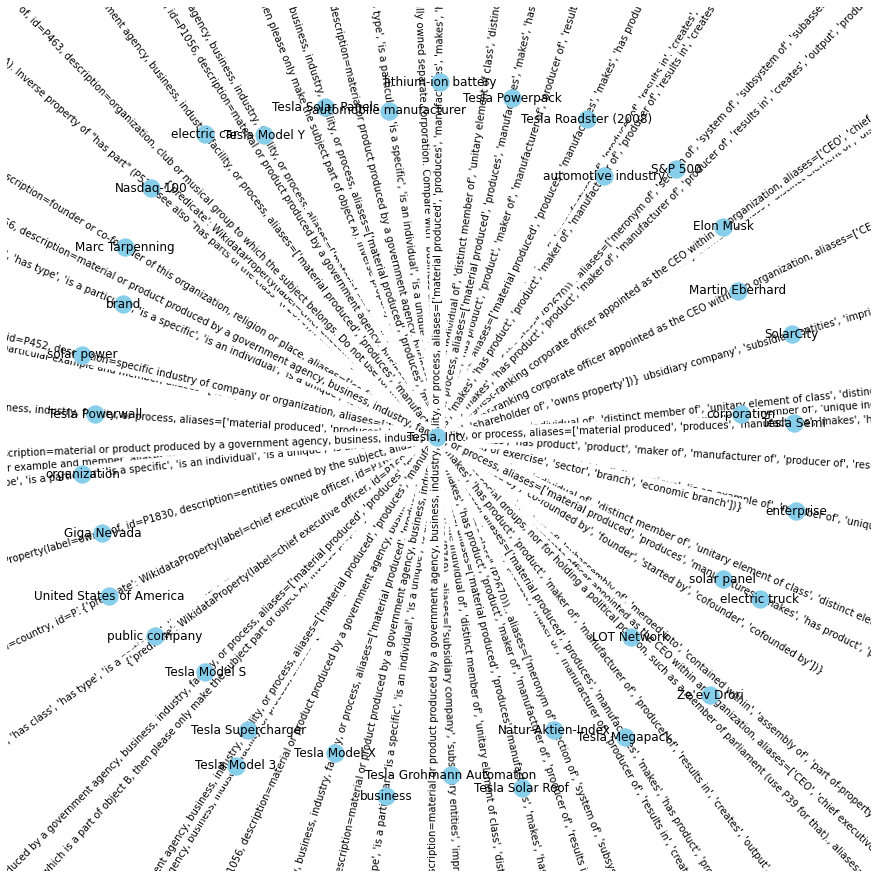

In [28]:
import networkx as nx
# In the future, we can use this as part of our visualization query, make it dynamic for every blockchain project 
# we have in our portfolio
graph  = nx.from_pandas_edgelist(df=wiki_triples_df[wiki_triples_df.subject == "Tesla, Inc."], source="subject", 
                                 target="object", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12)) # Size
pos = nx.spring_layout(graph) # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(graph, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos) # Draw Graph
nx.draw_networkx_edge_labels(graph, pos=pos) # Add edge labels
plt.show() 

#### <font color="green">6.3.1 Graph Reporting</font>

Add Graph reporting analysis

In [185]:
# code here

#### <font color="green">6.4.3 Enriching the Knowledge graph with News Data</font>
The idea is to detect relevant articles to keep with respect to our. 

This project is designed to be integrated into my knowledge graph. Where I want to reduce the amount of energy and time spent on identifying great, relevant information to read from a variety of sources. 

The objective here is to create a filter to extract the key information.
- Supervised Learning - issue with building human input to build metadata to discover key information
- Unsupervised Learning
- Graph Theory

Again out of all these options I am choosing Graph theory.


#### Iterative Process to Improve analysis

In [148]:
pytrend.trending_searches(pn='united_states') # trending searches in real time for United States

,0
0,South Carolina football
1,Winter storm warning
2,Manchester United
3,Tennessee football
4,Happy new year 2022
5,Bulls
6,Kyrie Irving
7,Michigan State football
8,Ben Roethlisberger
9,Alabama basketball


TOP CHARTS

In [150]:
top_charts_df = pytrend.top_charts(2021, hl='en-US', geo='US')
print(top_charts_df.head())

              title exploreQuery
0               NBA             
1               DMX             
2      Gabby Petito             
3  Kyle Rittenhouse             
4    Brian Laundrie             


In [152]:
# Get Google Hot Trends data
today_searches_df = pytrend.today_searches()
print(today_searches_df.head(10))

0    South Carolina football
1       Winter storm warning
2          Manchester United
3         Tennessee football
4        Happy new year 2022
5                      Bulls
6               Kyrie Irving
7    Michigan State football
8         Ben Roethlisberger
9         Alabama basketball
Name: query, dtype: object


In [175]:
# pytrend = TrendReq(hl='en-US')
pytrend.build_payload(kw_list=['pizza', 'bagel'], geo='US')
interest_by_region_df = pytrend.interest_by_region(=)
print(interest_by_region_df.head())

            pizza  bagel
geoName                 
Alabama        99      1
Alaska         98      2
Arizona        98      2
Arkansas       99      1
California     97      3


In this section let us visualize popular search queries using a circular barplot and observe  characteristics of search patterns.

We use a radar plot to illustrate this. For the radar plot, X values are angles and, y values are distance from the center of circle

X will represent the queries and y will represent the scoring.

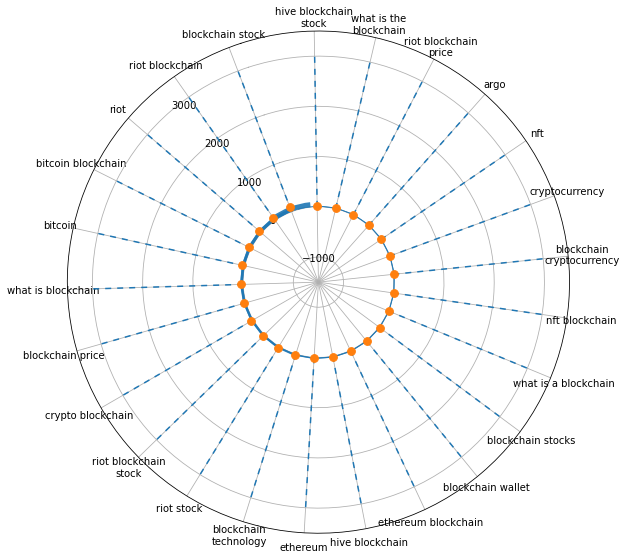

In [250]:
import matplotlib.pyplot as plt
# https://www.python-graph-gallery.com/web-circular-barplot-with-matplotlib

from textwrap import wrap
# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_df), endpoint=False)

# Scoring values
SCORING_VALUES = top_df["value"].values

# Query
TOP_QUERY = top_df["query"].values

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 3500)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, SCORING_VALUES, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
ax.scatter(ANGLES, SCORING_VALUES, s=60, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 20 characters.
TOP_QUERY = ["\n".join(wrap(r, 20, break_long_words=False)) for r in TOP_QUERY]
TOP_QUERY

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(TOP_QUERY, size=10);